# Deep Learning in Medicine
## BMSC-GA 4493, BMIN-GA 3007
## Homework 3: RNNs


Note: If you need to write mathematical terms, you can type your answers in a Markdown Cell via LaTex
See: <a href="https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook">here</a> if you have issues. To see basic LaTex notation see: <a href="https://en.wikibooks.org/wiki/LaTeX/Mathematics">here</a>.


Submission instruction: Upload your final jupyter notebook file, along with any figures that you may produce, in a zipped file named **netid_hw3** on Brightspace.

**Submission deadline: April 17th 2024 11:59pm.**



# Question 1: Literature Review: A combined deep CNN-LSTM network for the detection of COVID-19 (Total points 20 + 10 bonus points)

Read this paper:

#### Islam, Md Zabirul, Md Milon Islam, and Amanullah Asraf. "A combined deep CNN-LSTM network for the detection of novel coronavirus (COVID-19) using X-ray images." Informatics in medicine unlocked 20 (2020): 100412.

https://www.sciencedirect.com/science/article/pii/S2352914820305621

We are interested in the methods that is proposed in this publication, technical aspects of the implementation.

**1.1) (10 points)** Explore the "Development of combined network" section to outline the CNN-LSTM model's architecture proposed in the study. Detail the sequence and types of layers included, the dimensions of the input data, and the model's output characteristics, without focusing on the individual parameters of each layer.

The model is a combination of a CNN and LSTM architeture.  In total there are 20 layers:
- It begins with a 224x224x3 image going through 12 total convolutional layers with kernel size 3x3 and ReLu activation and 5 pooling layers throughout with 2x2 kernels followed by and 25% dropout after each pooling.  The convolutional layers are mostly used for feature extraction from the images. After the convolutional blocks the feature map is of size 7x7x512 and reshaped to 49x512 to enter the LSTM layer.
- The images then enter the LSTM layer which is an RNN structure that incorporates a cell state and gating mechanisms to be able to capture long term dependencies.  The LSTM layer uses the features that were learned from the convolutional layer to extract information about them to send to the fully connected layer for classification.
- After the LSTM layer, the features are flattened to 25088 and put through a fully connected layer to finally classify if the image is COVID-19, pneumonia, or normal. 

**1.2) (5 points)** In the "Experimental results analysis" section, the paper discusses the accuracy, specificity, sensitivity, and F1-score of the model. How do the metrics of accuracy, specificity, sensitivity, and F1-score individually assess the effectiveness of the CNN-LSTM model in accurately detecting COVID-19 cases from X-ray images? Discuss the significance of these metrics.

- Accuracy: Accuracy measures the overall correctness of the model's predictions (total correct/total predicted).  This would represent the percentage of correctly identified COVID-19 cases or not COVID-19 cases.  Although accuracy is intuitive to understand, just using accuracy alone would not be the best way to measure the model's success since there is likely class imbalance in the dataset.  If 99% of the images are not COVID-19 positive and the model guesses that all images are not COVID-19 positive, it would still acheive a 99% accuracy.  Therefore, it is important to consider other metrics as well when looking at classification models.
  
- Specificity: Specificity is the true negative rate (TN/(TN+FP)) which captures the proportion of actual negative cases that were correctly identified as negative by the model.  Therefore, this metric would measure how well the model can correctly identify images without COVID-19.
  
- Sensitivity: Sensitivity is the true positive rate (TP/(TP+FN)) which captures the proportion of actual positive cases that were correctly identified as positive by the model.  In this context this would measure how well the model classifies images with COVID-19.
  
- F1-Score: F1-score is a combination of precision and sensitivity and provides a balanced measure of the model's performance (2TP/(2TP + FP + FN)). Precision, is a measurement of the number of true positives over the total predicted positives.  Therefore, in this case, F1-score provides a more comprehensive assessment of the model's ability to both correctly classify positive COVID-19  cases as well as its ability to be correct when making a positive COVID-19 prediction, while taking into account the class imbalance in the dataset.

**1.3) (5 points)** What advantages does LSTM offer over traditional RNNs, and which specific architectural features of LSTM address the limitations commonly associated with RNNs? Citing one example is sufficient for this quesiton.

Instead of traditional RNN units, an LSTM RNN uses a memory block with a cell state. This cell state allows information to flow unchanged across many time steps without being significantly altered by activation functions. This enables the LSTM to retain information over longer sequences, capturing more long-term dependencies in the data than a traditional RNN.  Additionally, the LSTM architecture incorporates three gates: the input gate, forget gate, and output gate.  The input gate determines which information from the input should be stored in the cell state, the forget gate determines what information to keep or discard, and the output gate determines what information from the cell state should be sent to the next hidden state and output. These gates control the flow of information into and out of the cell state, allowing the network to selectively update and retain information over time.  These gates also help with capturing more long term dependencies as well as helping to mitigate the vanishing and exploding gradient problem, which is a limitation in traditional RNNs.

**1.5) (Bonus, maximum 10 points)**. Within the field of NLP, transformers have outperformed LSTM networks in various tasks. Discuss at least two advantages that transformers offer over LSTM models. Additionally, explore at least two limitations of current transformer architectures.

Two advantages of transformers over LSTM models:
1. Even though LSTMs are better than traditional RNNs at capturing long-range dependencies, transformers are even better.  Transformers use a self-attention mechanism which allows them to assign importance to all positions in the input sequence simultaneously, enabling them to capture long-range dependencies more effectively than LSTMs. This self-attention mechanism allows each token in the sequence to consider the importance of every other token, regardless of its position, resulting in a more global understanding of the input data. 

2. LSTMs are sequential models and have to process inputs one token at a time.  On the other hand, transformers have an advantage because they can easily be parallelized.  During self-attention, each token can attend to all other tokens in the sequence in parallel.  Therefore, transformers can be built to handle larger sequences and be parallelized bettre on GPUs, making them faster to train models with greater capacity.
   
Two limitations of current transformer architectures:
1. Although they can be parallelized, training transformers can be very computationally expensive especially when sequences are very long.  The self-attention mechanism requires pairwise comparisons between all tokens in the sequence, so as the sequence gets longer, the overall parameters greatly increases.

2. Tranformers aren't great at capturing the semantic relationships within the input.  Even though they are able to capture dependencies between tokens using self-attention, they may not fully understand the structural relationships between words in a sentence or the hierarchical nature of language.  For example, a transformer may not understand when double negatives are in a sentence as meaning the positive of that sentence.



# Question 2: : Literature Review: Vision transformer for generalized medical image classification. (20 points)

Read this paper: 


#### Omid Nejati Manzari, Hamid Ahmadabadi, Hossein Kashiani, Shahriar B. Shokouhi, Ahmad Ayatollahi .(2023). MedViT: A robust vision transformer for generalized medical image classification.

https://www.sciencedirect.com/science/article/pii/S0010482523002561?casa_token=hu4VVTckhpAAAAAA:6FYz2wUZ6eSTbBn_AiAUI6ROv12SeAMA3-ht5tL3rOR3Km74tVx5IvTQjsH35w0Vu8_S-cA

In this study, the authors propose a highly robust yet efficient CNN-Transformer hybrid model which is equipped with the locality of CNNs as well as the global connectivity of vision Transformers. 


**2.1) (10 points)** Describe the architecture of MedViT. How does it integrate the strengths of both CNNs and Transformers? Discuss the role of Efficient Convolution Block, Local Transformer Block, and Transformer Augmentation Block in achieving robust and efficient medical image classification.

MedVit is a CNN/Transformer hybrid used for medical imaging classification.  It's architecture is hierarchical including a series of four blocks of a patch embedding layer, a Efficient Convolution Block, and a Local Tranformer Blocks with a Patch Momentum Changer after the first block series. Below are details on the different blocks:

- The Efficient Convolution Block (ECB) consists of a Multi-Head Convolutional Attention (MHCA) token mixer which is fed into a a Locally Feed Forward Network (LFFN).  The MHCA concatentates the convolvutional attention (CA) of h parallel subspaces, and point-wise and group convolution are conducted.  Overall the MHCA allows for learning of the similarity between tokens that are close to each other.  The LFFN rearranges the sequence of tokens into a 2D feature map.  Then convolution takes place using two kernels followed by the feature map being transformed back to a sequence of tokens.  The LFFN does this in order to be able to capture locality by finding the proximity between tokens.  Overall the ECB helps to capture local representations in the image. 

- The Local Transformer Block (LTB) is better at capturing global representations within the image while also acting as a multi-frequency signal mixer.  It begins with a point-wise convolution, followed by an Efficient Self Attention (ESA) layer which captures low-frequency signals.  The ESA begins with batch normalization.  Then, the outputs K and V are put through an average pooling layer and their output along with Q are put through a Multi-Head Self Attention Layer (MHSA). After ESA there is an additional point-wise convolution, followed by another MHCA layer.  And finally there is another point-wise convolution, followed by an addtional LFFN layer.  The LTB overall is excellent at mixing multi-frequency information efficiently, since most transformer blocks end up losing high-frequency information while capturing the global context.

- The Patch Momentum Changer (PMC) which is in the Transformer Augmentation Block is used to normalize features and augment the data, which leads to more generalization.  The PMC combines the feature moment of one training sample with the normalized feature of another sample at the token level. This changes the loss function to consider points in both of the training examples, rather than just one which provides more diversity in the training data.

As shown through its architeture, MedViT is able to integrate strengths of both CNNs and Transformers.  CNNs typically are good at capturing local representations while Transformers are more equipped to capture global representations.  The ECB is the CNN portion which is able to pick up those local dependencies and information while the LTB is picking up more global information. Therefore, by combining these two blocks, MedVit is able to leverge both the local and global representations when making predictions.

MedVit also focuses on achieving robust and efficient medial image classification.  Robustness is important in medical image models given the scarcity of medical images and since images all from one machine may have a different distribution from another machine, but we want the model to be robust enough to still be effective on out-of-distribution (OOD) data.  Also, it is important the model is efficient so that it can be trained and utilized easily.  One way this model is robust and efficient is its combination of local and global representations, rather than focusing too much on local dependencies.  The the ECB efficiently captures these local features (which is still imporatant for model learning), but the combination of this with the light-weight LTB block provides robustness since the LTB picks up global features.  Additionally, as previously discussed, the Transformer Augmentation Block consists of a Patch Momentum Changer which augments the training samples through combining aspects of two training datapoints and having the model classify the image combined with the features of the other image.  Having augmentation within the model also  allows for more robust predictions because it increases diversity in the dataset, making the model less sensitive to noise or OOD data.  This is done efficiently within the model itself and can be combined with additional data augmentation strategies to the input very easily. 


**2.2) (5 points)**) Discuss the strategies employed by MedViT to enhance adversarial robustness and learn smoother decision boundaries. How does augmenting the shape information of an image in the high-level feature space contribute to this goal?

MedViT aims to enhance adverarial robustness and learn smoother decision boundaries through its Transformer Augmentation Block.  As discussed in the previous question the Transformer Augmentation Block consists of a Patch Momentum Changer (PMC).  The PMC combines the normalized features of training point with the features moments of another training point in order to make the targets for this point more robust and provide more diversity in training.  Therefore, using the PMC to augment the shape information of an image through the fusion of the two datapoints effects the global representation of the image, providing more diversity in the data and generalization from the transformer aspects of the model.  This helps the decision boundaries to be smoother since small amounts of noise in the image would be less impactful to the overall image prediction, since it is being trained to classify the image even with features of an additional image included.  It also helps protect against adversarial attacks because the model would be robust to changes involved in images coming from a different machine or when small amounts of noise is added.

**2.3) (5 points)** Based on the conclusions of the study, what future directions do the authors suggest for improving MedViT ? Discuss the potential for MedViT's application beyond the datasets evaluated in this study and briefly explain why MedViT would work well for those datasets.

The authors don't explicitly suggest a future direction to improve MedViT; however, they do mention that they want to apply the model to more datasets.  Therefore, they may need to finetune the model's architeture to work better in the context of different image datasets depending on if more low-level or high-level features are important for diagnosis.  For example, if a diagnosis of condition needs additional focus on the local features of the data, they may need larger or additonal convolutional blocks in the model to capture those features. 

Additional applications that MedViT could be used on that were not explicitly mentioned in the paper are classifications of other types of cancer such as lung and brain cancer.  Since the model was created with the purpose of classifying pneumonia and COVID-19, a natural extension could be detecting lung cancer in pateints as well using a similar architecture.  Given its success on liver CT images in detecting tumors, we can assume that this MedVit could hopefully work well on brain tumor detection given that both local and global representations of the brain will be necessary given the brain's complexity as an organ.  Overall MedViT's robustness and capacity makes it a great general vision transformer model for many medical applications. 


# Question 3 - Programming: Build Classifiers on Medical Transcriptions - Recurrent Neural Networks and Self Attention(60 points + 10 bonus points)

Let's build some models now. In this homework, we will focus on a dataset which has around 5000 medical transcriptions and the corresponding medical specialty. The data is available <a href="https://www.kaggle.com/tboyle10/medicaltranscriptions">here</a>.

Here, we will focus on predicting top few classes of medical specialty, from the transcription text. <a href="https://github.com/nyumc-dl/BMSC-GA-4493-Spring2024/blob/main/lab6/Lab6_RNN.ipynb">Lab 6</a> will be very useful here.


In [1]:
import re
import os
import time
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from torch.nn.utils.rnn import pad_sequence
from torch.nn.utils.rnn import pack_padded_sequence
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import roc_auc_score
from torch.utils.data import DataLoader, Dataset
import transformers
import random
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertModel, BertConfig, AutoModelForSequenceClassification
import pickle
import copy


[nltk_data] Downloading package punkt to /home/amr10211/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

print("Device being used: %s" %device)

There are 1 GPU(s) available.
We will use the GPU: Quadro RTX 8000
Device being used: cuda


**3.1) (5 points)** Read the csv using Pandas. Select the top 6 frequent classes ('medical_specialty') from the data. Only keep the rows that belong to one of these classes in your data. Which classes are there, and how many rows do you have after this filteration?

In [3]:
data_df = pd.read_csv('mtsamples.csv')
top_6_classes = data_df['medical_specialty'].value_counts()[:6]
data_df = data_df[data_df['medical_specialty'].isin(top_6_classes.index)].reset_index(drop=True)
print('Classes and Number of Rows:')
print(data_df['medical_specialty'].value_counts())
print('\nRows after filtering:', data_df.shape[0])

Classes and Number of Rows:
medical_specialty
Surgery                       1103
Consult - History and Phy.     516
Cardiovascular / Pulmonary     372
Orthopedic                     355
Radiology                      273
General Medicine               259
Name: count, dtype: int64

Rows after filtering: 2878


**3.2) (5 points)** Now convert your data into train, test and validation set. Shuffle the rows, and split them with ratios of (train:60%, valid:20%, test:20%). Set the random seed to 2024. Please follow the steps from https://pytorch.org/docs/stable/notes/randomness.html to set all the seeds to make the results reproducible.

In [4]:
random_state = 2024
torch.manual_seed(random_state)
random.seed(random_state)
np.random.seed(random_state)

#Remove NAs
data_df = data_df.dropna(subset=['transcription'])

# Splitting the data
train_data, temp_df = train_test_split(data_df, test_size = 0.4, shuffle=True, random_state=random_state)
val_data, test_data = train_test_split(temp_df, test_size = 0.5, shuffle=True,  random_state=random_state)

train_data = train_data.reset_index(drop=True)
val_data = val_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

# Summary of splits
print("Train set shape:", train_data.shape)
print("Validation set shape:", val_data.shape)
print("Test set shape:", test_data.shape)

Train set shape: (1717, 6)
Validation set shape: (572, 6)
Test set shape: (573, 6)


**3.3) (5 points)** Create a function to create vocabulary from the training data. Only use the transcription column for this. Use the tokenization scheme of your choice and create a vocabulary.

In [5]:
#From Lab 6:

UNK = "<UNK>"
PAD = "<PAD>"

def build_vocab(transcriptions, min_count=3, max_vocab=None):
    """
    Build vocabulary from transcriptions (list of strings)
    """
    # keep track of the number of appearance of each word
    word_count = Counter()
    
    for transcription in transcriptions:
        # Regular expression operations: [] (indicate a set of characters), 
        transcription = re.sub(r'[\\(\[#.!?,\'\/\])0-9]', ' ', transcription)
        word_count.update(word_tokenize(transcription.lower()))
    
    vocabulary = list([w for w in word_count if word_count[w] > min_count]) + [UNK, PAD]
    indices = dict(zip(vocabulary, range(len(vocabulary))))

    return vocabulary, indices

vocabulary, vocab_indices = build_vocab(train_data['transcription'])

print('Vocab Size:', len(vocabulary))

Vocab Size: 9170


**3.4) (10 points)** Write a dataloader and collate function so that we can begin to train our networks! You can choose to use either the complete transcription text or fix a maximum length of transcription text as input for your model.

In [6]:
#From Lab 6:

class TranscriptionDataset(Dataset):
    def __init__(self, vocab_index, df, label = 'medical_specialty'):
        self.vocab_index = vocab_index
        self.df = df
        self.label = label
        self.encoder = LabelEncoder()
        self.df[label] = self.encoder.fit_transform(self.df[label])


    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, key):
        sentence = self.df.loc[key, 'transcription']
        sentence = re.sub(r'[\\(\[#.!?,\'\/\])0-9]', ' ', sentence)
        token_indices = np.array([self.vocab_index[word] if word in self.vocab_index else self.vocab_index['<UNK>'] for word in word_tokenize(sentence.lower())])
        
        return (torch.tensor(token_indices), self.df.loc[key, self.label]) 


def pad_collate(batch):
    (xx, yy) = zip(*batch)
    x_lens = [len(x) for x in xx]
    xx_pad = pad_sequence(xx, batch_first=True, padding_value=len(vocabulary)-1)

    return torch.as_tensor(xx_pad), torch.as_tensor(x_lens), torch.LongTensor(yy)
    

BATCH_SIZE = 32

train_loader = DataLoader(TranscriptionDataset(vocab_indices, train_data),
                          batch_size=BATCH_SIZE,
                          shuffle=True,
                          collate_fn = pad_collate)
val_loader = DataLoader(TranscriptionDataset(vocab_indices, val_data),
                         batch_size=BATCH_SIZE,
                         shuffle=True,
                         collate_fn = pad_collate)
test_loader = DataLoader(TranscriptionDataset(vocab_indices, test_data),
                         batch_size=BATCH_SIZE,
                         shuffle=True,
                         collate_fn = pad_collate)

**3.5) (10 points)** Now you are ready to build your sequence classification model!

First, Build a simple GRU model that takes as input the text indices from the vocabulary, and ends with a softmax over total number of classes. Use the embedding and hidden dimension of your choice. 

**Please train your model to reach at the least 50% accuracy on the test set.**

At each epoch, compute and print **Average Cross Entropy loss** and **Accuracy** on both **train and validation set** 

Plot your validation and train loss over different epochs. 

Plot your validation and train accuracies over different epochs. 

Finally print accuracy on the test set.

In [7]:
#From Lab 6:

class RNN_GRU(nn.Module):
    def __init__(self, hidden_dim, output_dim, 
                 vocab_size, embedding_dim):
        super(RNN_GRU, self).__init__()
        self.emb = nn.Embedding(vocab_size, embedding_dim, padding_idx=vocab_size-1)
        self.hidden_dim = hidden_dim
        self.rnn = nn.GRU(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x, x_len):
        x = self.emb(x)
        _, last_hidden = self.rnn(pack_padded_sequence(x, x_len.to('cpu'), batch_first=True, enforce_sorted=False))
        out = self.fc(last_hidden.view(-1, self.hidden_dim)) #Softmax is included in cross entropy loss function
        return out

In [8]:
#From Lab 6:

def train(model, train_loader=train_loader, val_loader=val_loader, test_loader=test_loader, 
          learning_rate=0.001, num_epoch=10, print_every=100):
    acc_dict = {'train':[],'validate':[]}
    loss_dict = {'train':[],'validate':[]}
    test_acc = 0
    best_acc = 0
    
    # Training steps
    correct = 0
    total = 0
    running_loss = 0

    start_time = time.time()
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=10**(-5))
    for epoch in range(num_epoch):
        model.train()

        for i, (data, data_len, labels) in enumerate(train_loader):
            data, data_len, labels = data.to(device), data_len.to(device), labels.to(device)
            outputs = model(data, data_len)
            model.zero_grad()
            loss = loss_fn(outputs.squeeze(), labels)
            running_loss += loss.item()
            pred = outputs.data.max(-1)[1]
            total += labels.size(0)
            correct += (pred == labels).sum()
            loss.backward()
            optimizer.step()
            
        epoch_loss = float(running_loss/total)
        acc = float(100 * correct / total)
        loss_dict['train'].append(epoch_loss)
        acc_dict['train'].append(acc)
        elapse = time.strftime('%H:%M:%S', time.gmtime(int((time.time() - start_time))))
        print('Training set | Accuracy: {:6.4f} | Loss: {:6.4f} | time elapse: {:>9}'.format(
                acc, epoch_loss, elapse))

        
    # Evaluate after every epoch - VAL
        correct = 0
        total = 0
        running_loss = 0

        model.eval()

        with torch.no_grad():
            for i, (data, data_len, labels) in enumerate(val_loader):
                data, data_len, labels = data.to(device), data_len.to(device), labels.to(device)
                outputs = model(data, data_len)
                loss = loss_fn(outputs.squeeze(), labels)
                running_loss += loss.item()
                pred = outputs.data.max(-1)[1]
                total += labels.size(0)
                correct += (pred == labels).sum()

            epoch_loss = float(running_loss/total)
            acc = float(100 * correct / total)
            loss_dict['validate'].append(epoch_loss)
            acc_dict['validate'].append(acc)

            elapse = time.strftime('%H:%M:%S', time.gmtime(int((time.time() - start_time))))
            print('Validation set | Accuracy: {:6.4f} | Loss: {:6.4f} | time elapse: {:>9}'.format(
                acc, epoch_loss, elapse))
            if acc > best_acc:
                    best_acc = acc
                    best_model_wts = copy.deepcopy(model.state_dict())

    model.load_state_dict(best_model_wts) #USE MODEL WITH BEST WEIGHTS

    
    #Test accuracy with final model:
    with torch.no_grad():
        correct = 0
        total = 0
        model.eval()

        with torch.no_grad():
            for i, (data, data_len, labels) in enumerate(test_loader):
                data, data_len, labels = data.to(device), data_len.to(device), labels.to(device)
                outputs = model(data, data_len)
                pred = outputs.data.max(-1)[1]
                total += labels.size(0)
                correct += (pred == labels).sum()

            test_acc = float(100 * correct / total)

        elapse = time.strftime('%H:%M:%S', time.gmtime(int((time.time() - start_time))))
        print('Test set | Accuracy: {:6.4f} | time elapse: {:>9}'.format(
            test_acc, elapse))
        
    return model, acc_dict, loss_dict, test_acc

In [9]:
gru_model = RNN_GRU(40, 6, len(vocabulary), 50).to(device)
model, acc_dict, loss_dict, test_acc = train(gru_model, train_loader, val_loader, test_loader)

Training set | Accuracy: 35.9348 | Loss: 0.0514 | time elapse:  00:00:07
Validation set | Accuracy: 36.7133 | Loss: 0.0495 | time elapse:  00:00:08
Training set | Accuracy: 39.5369 | Loss: 0.0481 | time elapse:  00:00:12
Validation set | Accuracy: 40.0350 | Loss: 0.0487 | time elapse:  00:00:13
Training set | Accuracy: 43.0756 | Loss: 0.0463 | time elapse:  00:00:17
Validation set | Accuracy: 40.9091 | Loss: 0.0473 | time elapse:  00:00:18
Training set | Accuracy: 46.9201 | Loss: 0.0432 | time elapse:  00:00:22
Validation set | Accuracy: 49.1259 | Loss: 0.0431 | time elapse:  00:00:23
Training set | Accuracy: 49.8908 | Loss: 0.0411 | time elapse:  00:00:27
Validation set | Accuracy: 49.3007 | Loss: 0.0435 | time elapse:  00:00:28
Training set | Accuracy: 52.1625 | Loss: 0.0394 | time elapse:  00:00:33
Validation set | Accuracy: 47.2028 | Loss: 0.0437 | time elapse:  00:00:34
Training set | Accuracy: 52.5120 | Loss: 0.0391 | time elapse:  00:00:38
Validation set | Accuracy: 50.6993 | Lo

In [10]:
torch.save(gru_model.state_dict(), 'gru_model.pth')

acc_filename = 'acc_dict_gru.pkl'
loss_filename = 'loss_dict_gru.pkl'

with open(acc_filename, 'wb') as file:
    pickle.dump(acc_dict, file)

with open(loss_filename, 'wb') as file:
    pickle.dump(loss_dict, file)

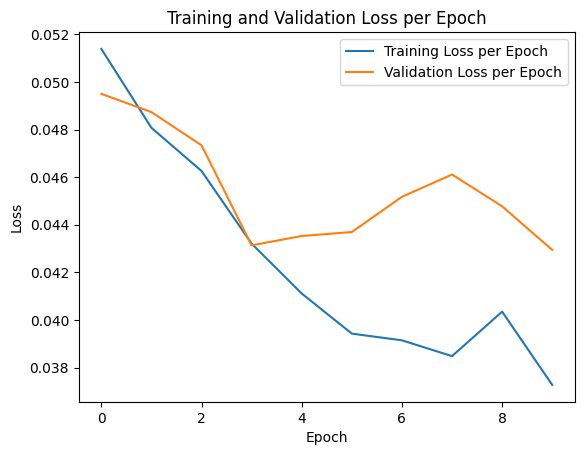

In [11]:
plt.plot(range(0,len(loss_dict['train'])),loss_dict['train'], label = 'Training Loss per Epoch')
plt.plot(range(0,len(loss_dict['validate'])),loss_dict['validate'],  label = 'Validation Loss per Epoch')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

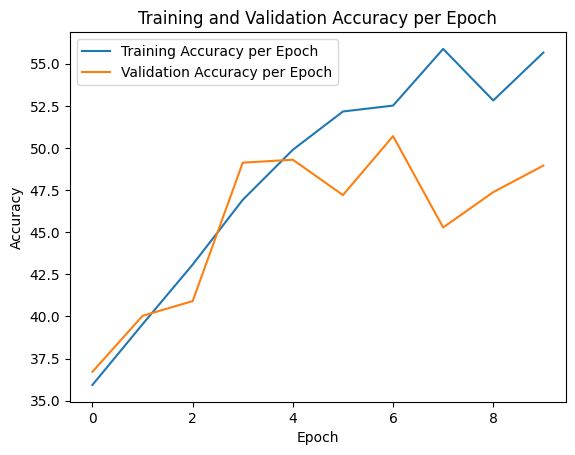

In [12]:
plt.plot(range(0,len(acc_dict['train'])),acc_dict['train'], label = 'Training Accuracy per Epoch')
plt.plot(range(0,len(acc_dict['validate'])),acc_dict['validate'],  label = 'Validation Accuracy per Epoch')
plt.title('Training and Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
print('Test Accuracy', test_acc)

Test Accuracy 53.403141021728516


**3.6) (25 points)** Now, let's finetune a sequence classification model based on BERT. Please install the Huggingface's Transformers library for this. Use the Pretrained 'bert-base-uncased' model for this problem. Please use the BERT tokenizer from the pretrained built for 'bert-base-uncased' model . Use the AdamW optimizer from the transformers library for optimization. Remember BERT uses Attention masks for input so you need to create a separate dataloader for BERT. Please keep in mind that BERT can handle maximum of 512 tokens.

**Please finetune the model so that it reaches at least 60% accuracy on the test set.**

The rest of your experimental setting should be the same as 3.5:

At each epoch, compute and print **Average Cross Entropy loss** and **Accuracy** on both **train and validation set** 

Plot your validation and train loss over different epochs. 

Plot your validation and train accuracies over different epochs. 

Finally print accuracy on the test set.

In [5]:
#Using Huggingface documentation:
MAX_LEN = 512
BATCH_SIZE = 32
EPOCHS = 10
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [6]:
#New Dataloader:

class TranscriptionDataset_BERT(Dataset):

    def __init__(self, dataframe, tokenizer, max_len, label = 'medical_specialty'):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.transcription = dataframe.transcription

        #Encode Labels:
        self.label = label
        self.encoder = LabelEncoder()
        self.data[label] = self.encoder.fit_transform(self.data[label])
        
        self.targets = self.data[label]
        self.max_len = max_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        transcription = str(self.transcription[index])
        transcription = " ".join(transcription.split())

        inputs = self.tokenizer.encode_plus(
            transcription,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True
        )

        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(self.targets[index], dtype=torch.float)
        }

In [7]:
training_set = TranscriptionDataset_BERT(train_data, tokenizer, MAX_LEN)
validation_set = TranscriptionDataset_BERT(val_data, tokenizer, MAX_LEN)
testing_set = TranscriptionDataset_BERT(test_data, tokenizer, MAX_LEN)

train_params = {'batch_size': BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

val_params = {'batch_size': BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

test_params = {'batch_size': BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

train_loader_BERT = DataLoader(training_set, **train_params)
val_loader_BERT = DataLoader(validation_set, **train_params)
test_loader_BERT = DataLoader(testing_set, **test_params)

In [8]:
def train_BERT(model, train_loader=train_loader_BERT, val_loader=val_loader_BERT, test_loader=test_loader_BERT, 
          learning_rate=1e-05, num_epoch=10, print_every=100):
    acc_dict = {'train':[],'validate':[]}
    loss_dict = {'train':[],'validate':[]}
    test_acc = 0
    best_acc = 0
    
    # Training steps
    correct = 0
    total = 0
    running_loss = 0

    start_time = time.time()
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=10**(-5))
    for epoch in range(num_epoch):
        model.train()
        for _, data in enumerate(train_loader, 0):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            labels = data['targets'].to(device, dtype = torch.float)
            outputs = model(ids, mask, token_type_ids)
            logits = outputs.logits
            optimizer.zero_grad()

            model.zero_grad()
            loss = loss_fn(logits, labels.long())
            running_loss += loss.item()
            pred = torch.argmax(outputs.logits, axis=1)
            total += labels.size(0)
            correct += (pred == labels).sum()
            loss.backward()
            optimizer.step()
            
        epoch_loss = float(running_loss/total)
        acc = float(100 * correct / total)
        loss_dict['train'].append(epoch_loss)
        acc_dict['train'].append(acc)
        elapse = time.strftime('%H:%M:%S', time.gmtime(int((time.time() - start_time))))
        print('Training set | Accuracy: {:6.4f} | Loss: {:6.4f} | time elapse: {:>9}'.format(
                acc, epoch_loss, elapse))
        
    # Evaluate after every epoch - VAL
        correct = 0
        total = 0
        running_loss = 0

        model.eval()

        with torch.no_grad():
            for _,data in enumerate(val_loader, 0):
                ids = data['ids'].to(device, dtype = torch.long)
                mask = data['mask'].to(device, dtype = torch.long)
                token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
                labels = data['targets'].to(device, dtype = torch.float)
                outputs = model(ids, mask, token_type_ids)
                logits = outputs.logits
                loss = loss_fn(logits, labels.long())
                running_loss += loss.item()
                pred = torch.argmax(outputs.logits, axis=1)
                total += labels.size(0)
                correct += (pred == labels).sum()

            epoch_loss = float(running_loss/total)
            acc = float(100 * correct / total)
            loss_dict['validate'].append(epoch_loss)
            acc_dict['validate'].append(acc)

            elapse = time.strftime('%H:%M:%S', time.gmtime(int((time.time() - start_time))))
            print('Validation set | Accuracy: {:6.4f} | Loss: {:6.4f} | time elapse: {:>9}'.format(
                acc, epoch_loss, elapse))

            if acc > best_acc:
                best_acc = acc
                best_model_wts = copy.deepcopy(model.state_dict())

    model.load_state_dict(best_model_wts) #USE MODEL WITH BEST WEIGHTS


    #Test accuracy with final model:
    with torch.no_grad():
        correct = 0
        total = 0
        model.eval()

        with torch.no_grad():
            for _,data in enumerate(test_loader, 0):
                ids = data['ids'].to(device, dtype = torch.long)
                mask = data['mask'].to(device, dtype = torch.long)
                token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
                labels = data['targets'].to(device, dtype = torch.float)
                outputs = model(ids, mask, token_type_ids)
                pred = torch.argmax(outputs.logits, axis=1)
                total += labels.size(0)
                correct += (pred == labels).sum()

            test_acc = float(100 * correct / total)

        elapse = time.strftime('%H:%M:%S', time.gmtime(int((time.time() - start_time))))
        print('Test set | Accuracy: {:6.4f} | time elapse: {:>9}'.format(
            test_acc, elapse))

    return model, acc_dict, loss_dict, test_acc
        

In [9]:
model_bert = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=6)
model_bert.to(device)

bert_model, acc_dict, loss_dict, test_acc = train_BERT(model_bert, train_loader_BERT, val_loader_BERT, test_loader_BERT)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/ext3/miniconda3/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:2688: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length

Training set | Accuracy: 42.8072 | Loss: 0.0484 | time elapse:  00:00:59
Validation set | Accuracy: 53.8462 | Loss: 0.0418 | time elapse:  00:01:09
Training set | Accuracy: 57.5797 | Loss: 0.0380 | time elapse:  00:02:07
Validation set | Accuracy: 57.5175 | Loss: 0.0350 | time elapse:  00:02:17
Training set | Accuracy: 61.2495 | Loss: 0.0321 | time elapse:  00:03:16
Validation set | Accuracy: 60.1399 | Loss: 0.0306 | time elapse:  00:03:26
Training set | Accuracy: 63.1717 | Loss: 0.0280 | time elapse:  00:04:24
Validation set | Accuracy: 60.8392 | Loss: 0.0270 | time elapse:  00:04:35
Training set | Accuracy: 65.0066 | Loss: 0.0244 | time elapse:  00:05:33
Validation set | Accuracy: 62.0629 | Loss: 0.0256 | time elapse:  00:05:43
Training set | Accuracy: 67.1909 | Loss: 0.0226 | time elapse:  00:06:42
Validation set | Accuracy: 58.5664 | Loss: 0.0258 | time elapse:  00:06:52
Training set | Accuracy: 67.6278 | Loss: 0.0214 | time elapse:  00:07:51
Validation set | Accuracy: 58.2168 | Lo

In [10]:
torch.save(bert_model.state_dict(), 'bert_model.pth')

acc_filename = 'acc_dict_bert.pkl'
loss_filename = 'loss_dict_bert.pkl'

with open(acc_filename, 'wb') as file:
    pickle.dump(acc_dict, file)

with open(loss_filename, 'wb') as file:
    pickle.dump(loss_dict, file)

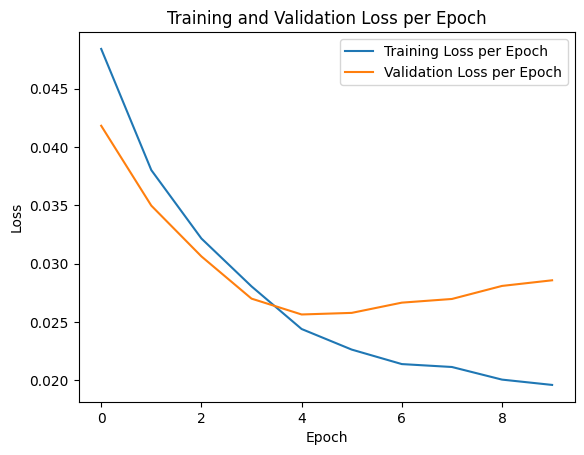

In [11]:
plt.plot(range(0,len(loss_dict['train'])),loss_dict['train'], label = 'Training Loss per Epoch')
plt.plot(range(0,len(loss_dict['validate'])),loss_dict['validate'],  label = 'Validation Loss per Epoch')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

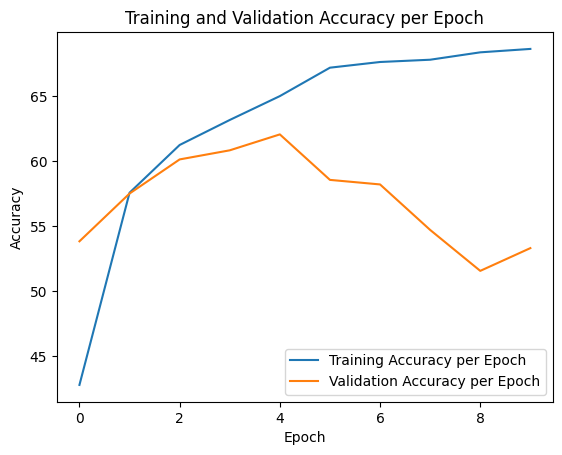

In [12]:
plt.plot(range(0,len(acc_dict['train'])),acc_dict['train'], label = 'Training Accuracy per Epoch')
plt.plot(range(0,len(acc_dict['validate'])),acc_dict['validate'],  label = 'Validation Accuracy per Epoch')
plt.title('Training and Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
print('Test Accuracy', test_acc)

Test Accuracy 63.001747131347656


**3.7) (Bonus maximum 10 points)** List 5 examples on the test set that BERT misclassified. Describe reasons identified for misclassification.

In [46]:
misclassified_text = []
misclassified_pred = []
misclassified_label = []

label_encoder = testing_set.encoder

for _,data in enumerate(test_loader_BERT, 0):
    ids = data['ids'].to(device, dtype = torch.long)
    mask = data['mask'].to(device, dtype = torch.long)
    token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
    labels = data['targets'].to(device, dtype = torch.float)
    outputs = model_bert(ids, mask, token_type_ids)
    logits = outputs.logits
    pred = torch.argmax(outputs.logits, axis=1)
    decoded_pred = label_encoder.inverse_transform(pred.cpu().numpy().astype(int))
    decoded_label = label_encoder.inverse_transform(labels.cpu().numpy().astype(int))

    for i, (l, p) in enumerate(zip(decoded_pred, decoded_label)):
        if l != p:
            misclassified_text.append(tokenizer.decode(ids[i]))
            misclassified_pred.append(l)
            misclassified_label.append(p)
    

/ext3/miniconda3/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:2688: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/ext3/miniconda3/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:2688: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the ma

In [47]:
print('5 Misclassified Examples:')

print('\nLabel:', misclassified_label[0])
print('Predicted Label:', misclassified_pred[0])
print('Transcription:', misclassified_text[0])

print('\nLabel:', misclassified_label[1])
print('Predicted Label:', misclassified_pred[1])
print('Transcription:', misclassified_text[1])

print('\nLabel:', misclassified_label[2])
print('Predicted Label:', misclassified_pred[2])
print('Transcription:', misclassified_text[2])

print('\nLabel:', misclassified_label[3])
print('Predicted Label:', misclassified_pred[3])
print('Transcription:', misclassified_text[3])

print('\nLabel:', misclassified_label[4])
print('Predicted Label:', misclassified_pred[4])
print('Transcription:', misclassified_text[4])

5 Misclassified Examples:

Label:  Radiology
Predicted Label:  Cardiovascular / Pulmonary
Transcription: [CLS] procedure done :, resting myoview and adenosine myoview spect., indications :, chest pain., procedure :, 13. 3 mci of tc - 99m tetrofosmin was injected and resting myoview spect was obtained. pharmacologic stress testing was done using adenosine infusion. patient received 38 mg of adenosine infused at 140 mcg / kg / minute over a period of four minutes. two minutes during adenosine infusion, 31. 6 mci of tc - 99m tetrofosmin was injected. resting heart rate was 90 beats per minute. resting blood pressure was 130 / 70. peak heart rate obtained during adenosine infusion was 102 beats per minute. blood pressure obtained during adenosine infusion was 112 / 70. during adenosine infusion, patient experienced dizziness and shortness of breath. no significant st segment, t wave changes, or arrhythmias were seen., resting myoview and adenosine myoview spect showed uniform uptake of iso

For many of these examples, the BERT model's misclassifications look like they are mainly due to seeing key words that relate to a different medical specialties.  For example, both the first and second example mention many cardiovasular terms such as "chest pain", "ventricular", and "atrial fibrillation", so the model picked up these words as important and classified as Cardiovascular / Pulmonary rather than Radiology and Surgery, respectively.  Similarly in the fourth example, the word "procedure" and many surgical terms were found in the text, and the text is much shorter transcription than the others.  Therefore, it makes sense that this example was misclassified since there wasn't much additional information for the model to use.  Likewise, the fifth example uses a lot of orthopedic terminology like "ligament" and "knee", so like the others the misclassification makes a lot of sense.  Overall these examples show BERT picking up on the importance of words in the global context, without really understanding the meaning and semantic relationships within the transcription. The third example is a bit more unique.  It classified as Consult when its true label was General Medicine.  I think this misclassification is due to the similarity of "generalness" that Consult and General Medicine have.  Although Consult would happen before General Medicine, both would be about more broad topics than more of the specific medical specialties, so I would expect that it would be quite difficult for the model to discern between the two. 